<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [16]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [17]:
# Check missing values in critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork', 'YearsCodePro', 'LanguageHaveWorkedWith', 'EdLevel']
missing_data = df[critical_columns].isnull().sum()
print("Missing values in critical columns:")
print(missing_data)

# Handle missing values based on column significance
# For categorical columns, fill with mode or 'Unknown'
df['Employment'] = df['Employment'].fillna('Unknown')
df['JobSat'] = df['JobSat'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')
df['EdLevel'] = df['EdLevel'].fillna('Unknown')

# For numerical columns, consider median or specific strategy
df['YearsCodePro'] = df['YearsCodePro'].replace('NA', 'NaN')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
median_years = df['YearsCodePro'].median()
df['YearsCodePro'] = df['YearsCodePro'].fillna(median_years)

# For LanguageHaveWorkedWith, fill with empty string
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')

print("\nMissing values after handling:")
print(df[critical_columns].isnull().sum())

Missing values in critical columns:
Employment                    0
JobSat                    36311
RemoteWork                10631
YearsCodePro              13827
LanguageHaveWorkedWith     5692
EdLevel                    4653
dtype: int64

Missing values after handling:
Employment                0
JobSat                    0
RemoteWork                0
YearsCodePro              0
LanguageHaveWorkedWith    0
EdLevel                   0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipython-input-617886763.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_satisfaction = df.groupby('ExperienceRange')['JobSat_numeric'].median().dropna()


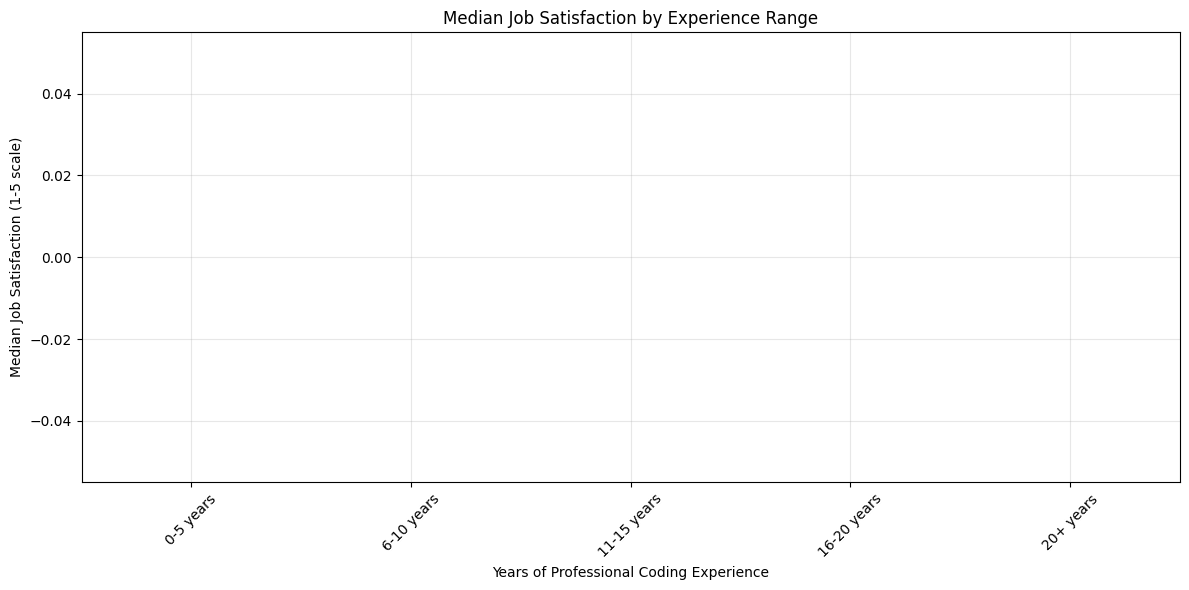

Median Job Satisfaction by Experience Range:
ExperienceRange
0-5 years      0.0
6-10 years     0.0
11-15 years    0.0
16-20 years    0.0
20+ years      0.0
Name: JobSat_numeric, dtype: float64


In [19]:
# Create experience ranges
bins = [0, 5, 10, 15, 20, 50]
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '20+ years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Convert JobSat to numerical scale for analysis
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5,
    'Unknown': 0  # Handle unknown values as needed
}
df['JobSat_numeric'] = df['JobSat'].map(jobsat_mapping)

# Calculate median satisfaction for each experience range
experience_satisfaction = df.groupby('ExperienceRange')['JobSat_numeric'].median().dropna()

# Visualize the relationship
plt.figure(figsize=(12, 6))
experience_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (1-5 scale)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Median Job Satisfaction by Experience Range:")
print(experience_satisfaction)

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


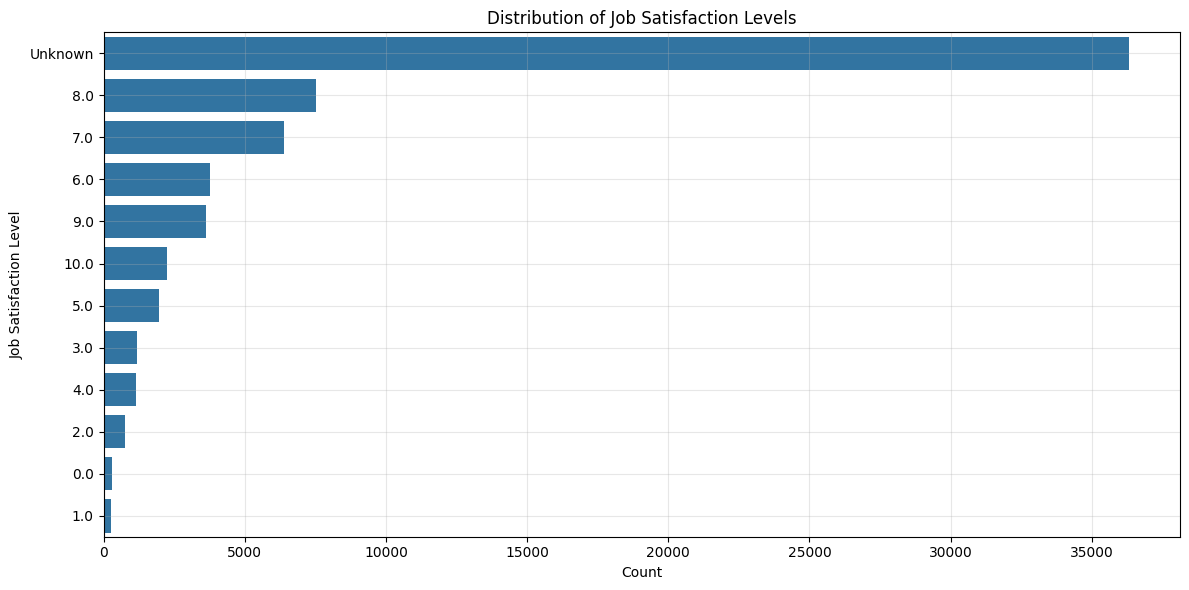

Job Satisfaction Distribution:
JobSat
Unknown    36311
8.0         7509
7.0         6379
6.0         3751
9.0         3626
10.0        2251
5.0         1956
3.0         1165
4.0         1130
2.0          772
0.0          311
1.0          276
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Count')
plt.ylabel('Job Satisfaction Level')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display value counts
print("Job Satisfaction Distribution:")
print(df['JobSat'].value_counts())

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


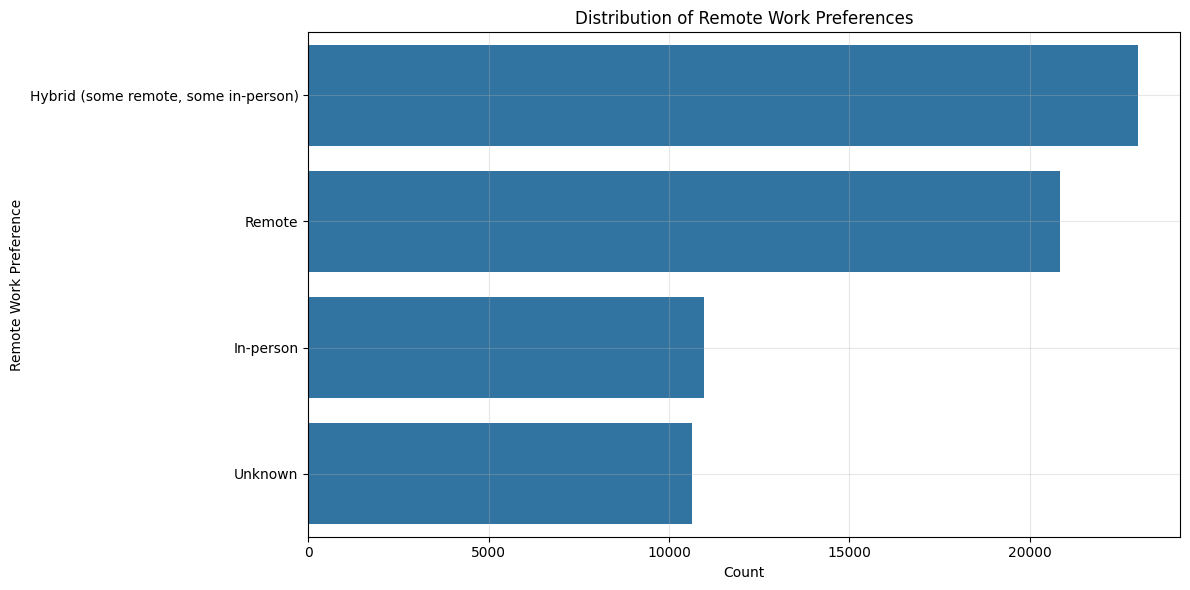

Remote Work Preferences by Employment Type:
Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17281   
In-person                                            8552   
Remote                                              13193   
Unknown                                                15   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   
Unknown                                                                     0   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-

/tmp/ipython-input-2647291061.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

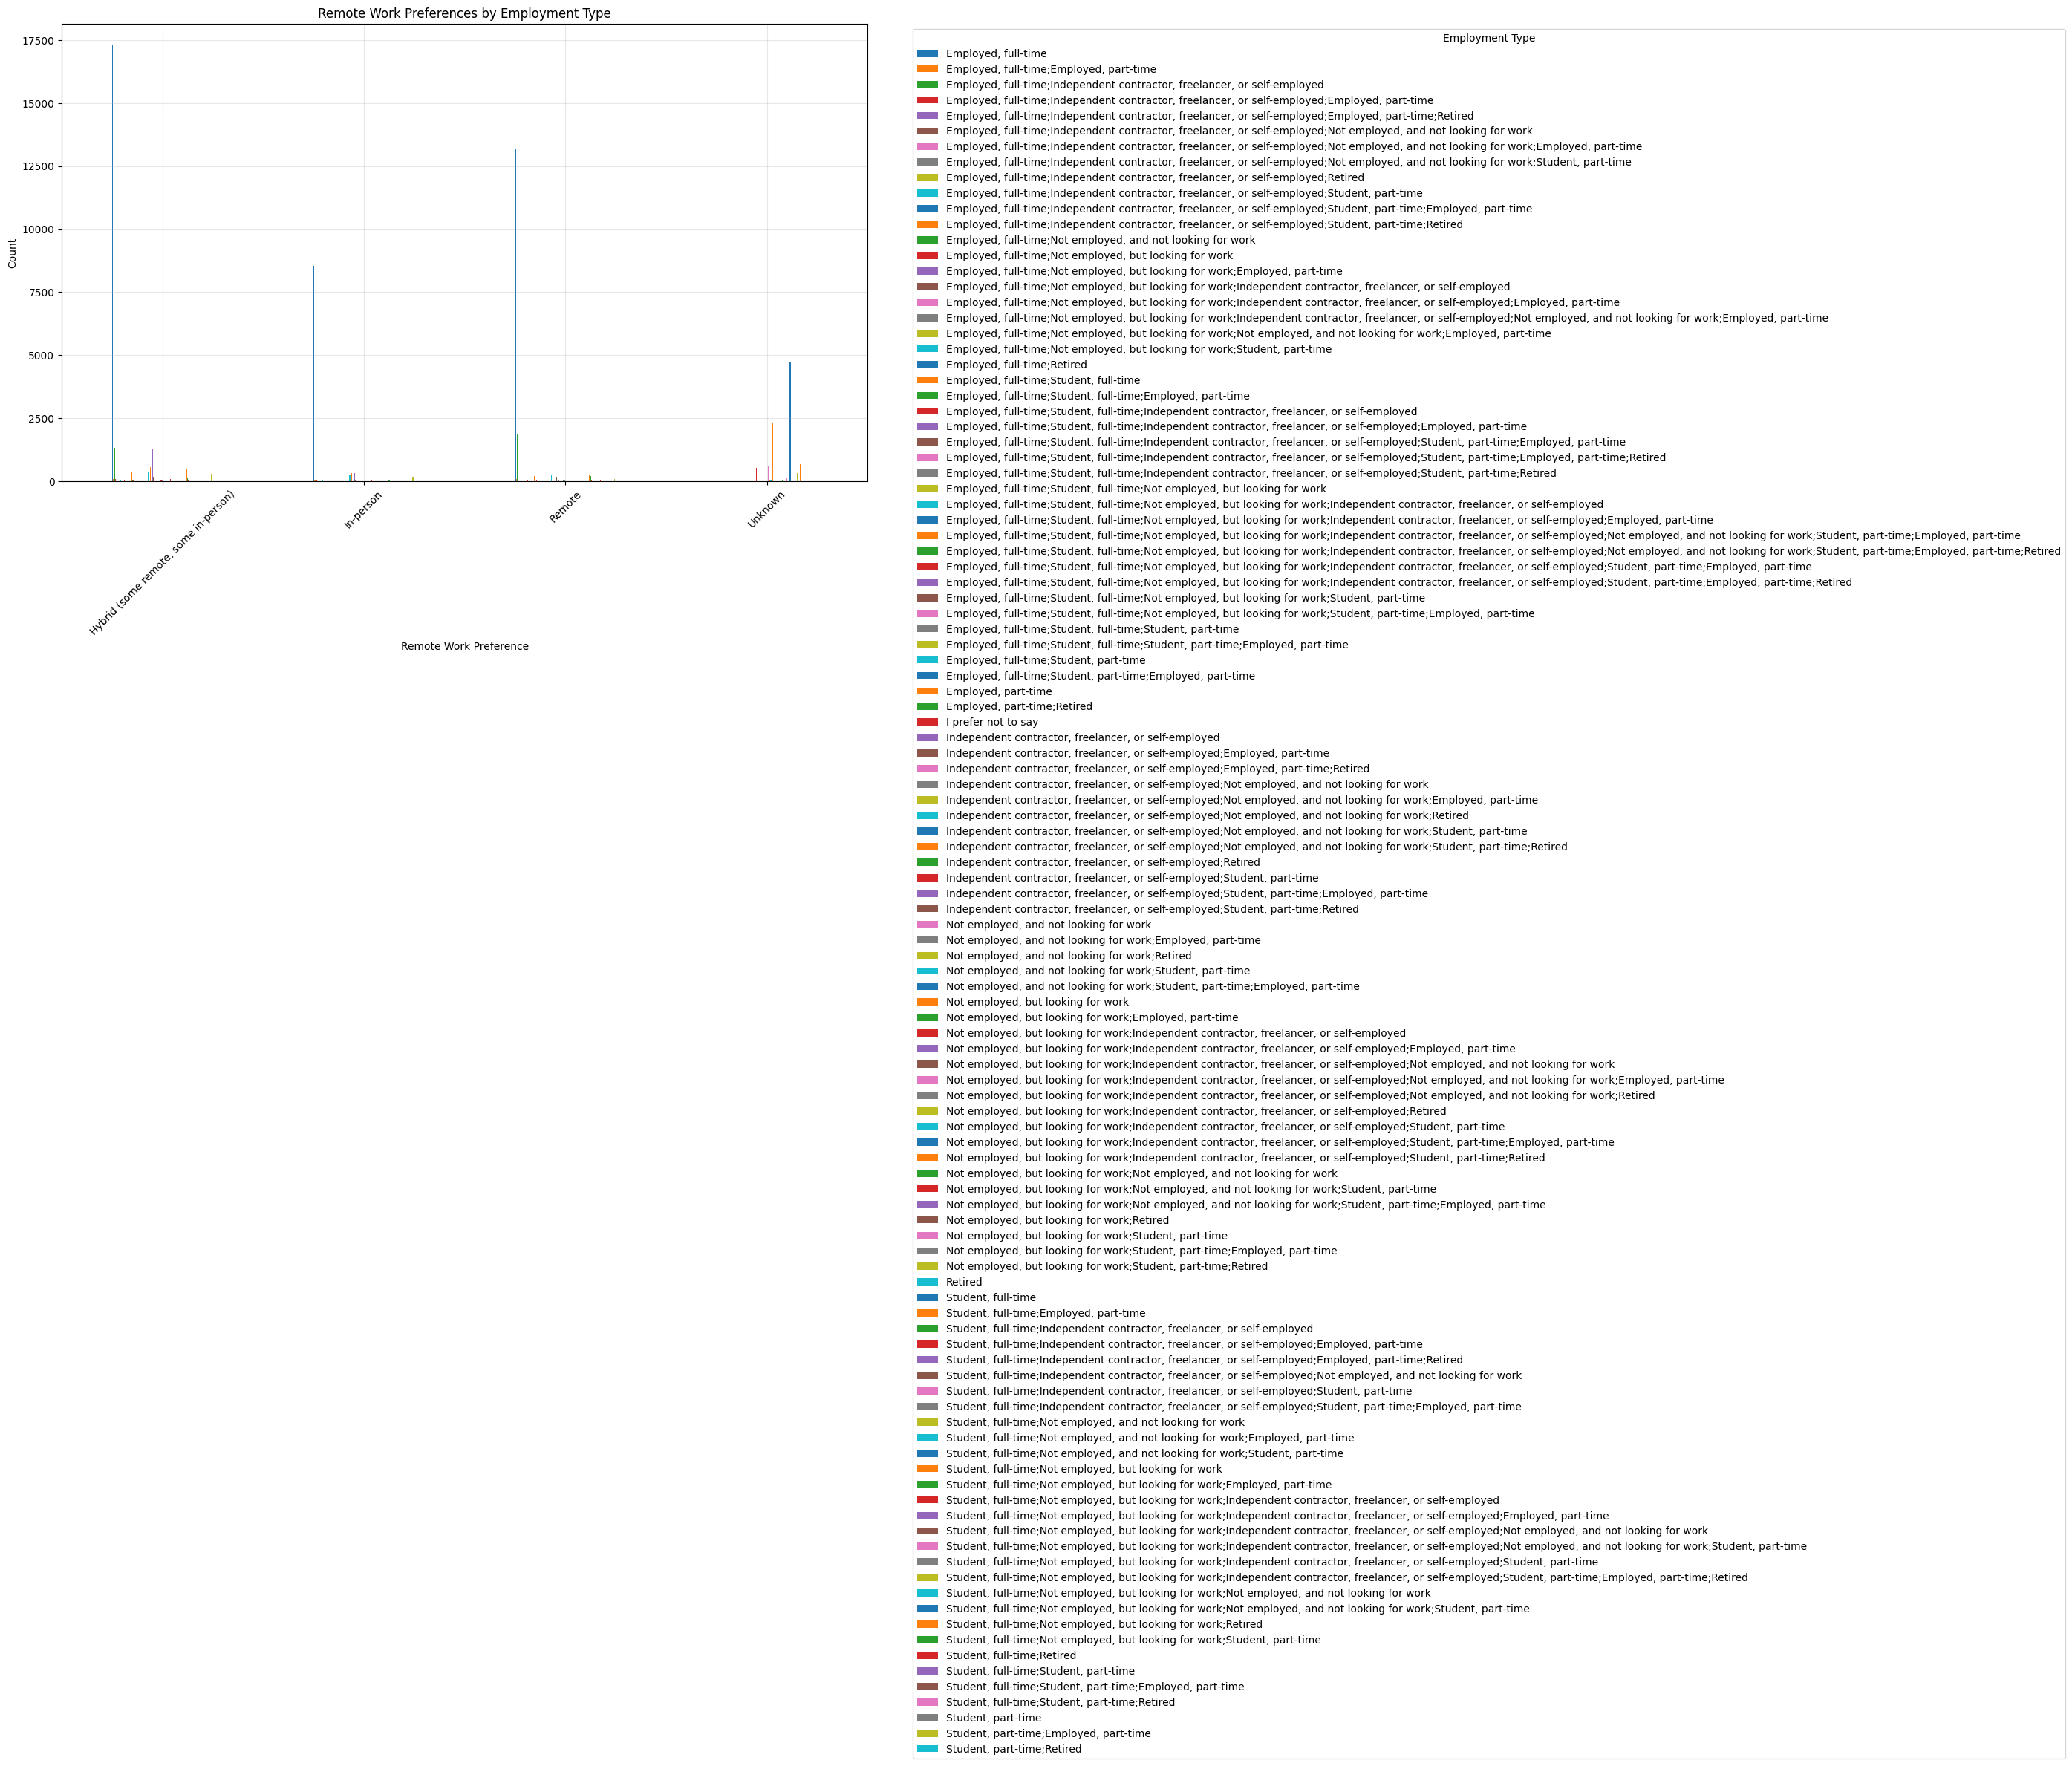

In [22]:
# Count plot for remote work distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Count')
plt.ylabel('Remote Work Preference')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Remote work by employment type
remote_employment = pd.crosstab(df['RemoteWork'], df['Employment'])
print("Remote Work Preferences by Employment Type:")
print(remote_employment)

# Visualize cross-tabulation
plt.figure(figsize=(14, 8))
remote_employment.plot(kind='bar', figsize=(14, 8))
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


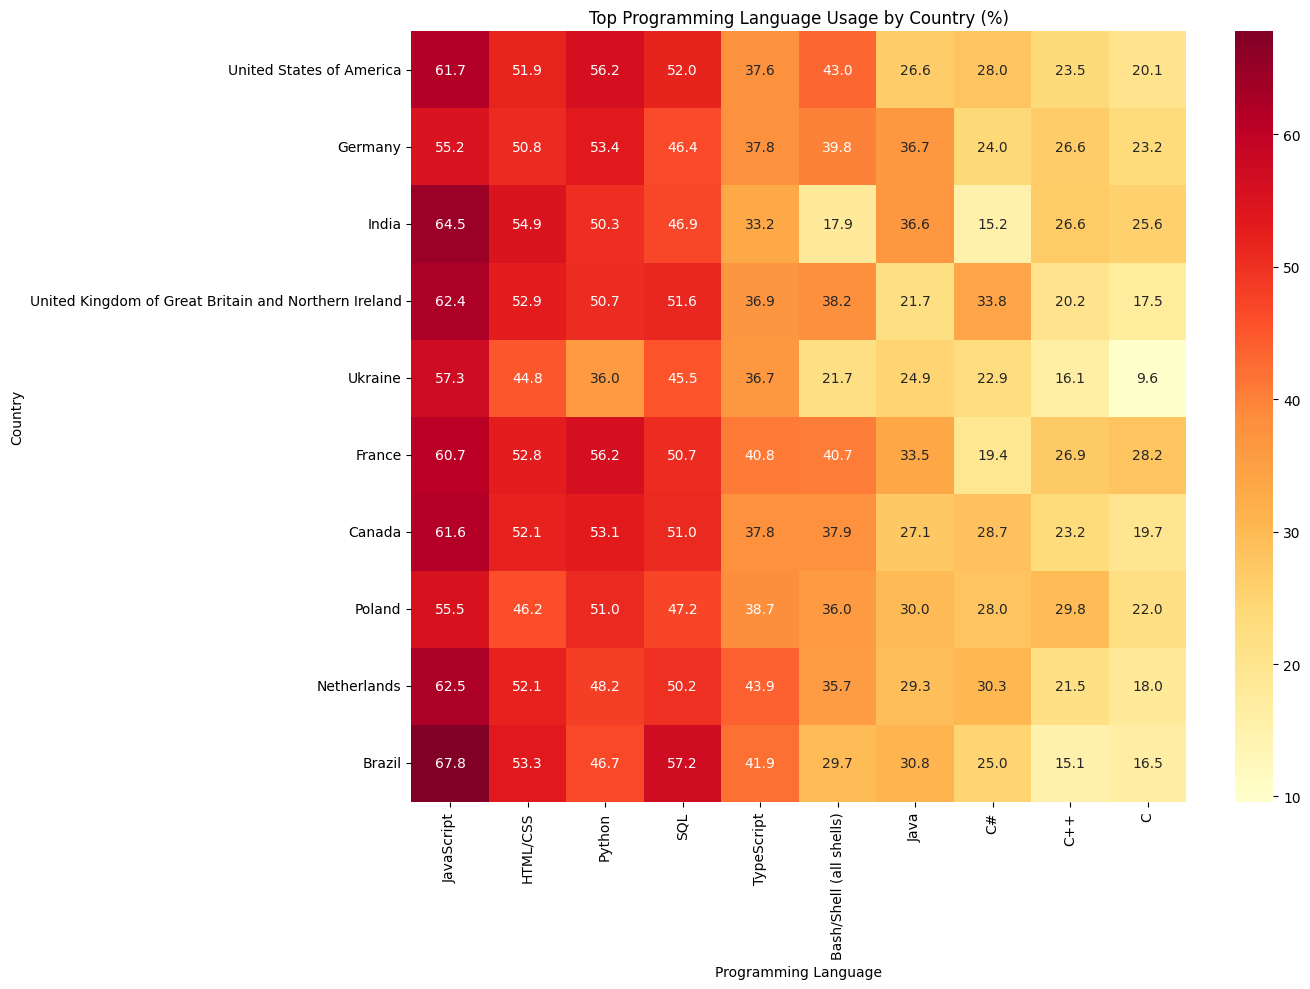

In [24]:
# Get top countries/regions
top_countries = df['Country'].value_counts().head(10).index

# Analyze programming languages by region
all_languages = []
for languages in df['LanguageHaveWorkedWith']:
    if languages:
        lang_list = languages.split(';')
        all_languages.extend(lang_list)

top_languages = pd.Series(all_languages).value_counts().head(10).index

# Create a matrix of language usage by country
lang_by_country = pd.DataFrame()

for country in top_countries:
    country_data = df[df['Country'] == country]
    country_langs = []
    for languages in country_data['LanguageHaveWorkedWith']:
        if languages:
            lang_list = languages.split(';')
            country_langs.extend(lang_list)

    lang_counts = pd.Series(country_langs).value_counts()
    for lang in top_languages:
        lang_by_country.loc[country, lang] = lang_counts.get(lang, 0)

# Normalize by country size (percentage of respondents)
country_totals = df['Country'].value_counts()
for country in top_countries:
    lang_by_country.loc[country] = (lang_by_country.loc[country] / country_totals[country]) * 100

# Heatmap visualization
plt.figure(figsize=(14, 10))
sns.heatmap(lang_by_country, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Top Programming Language Usage by Country (%)')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


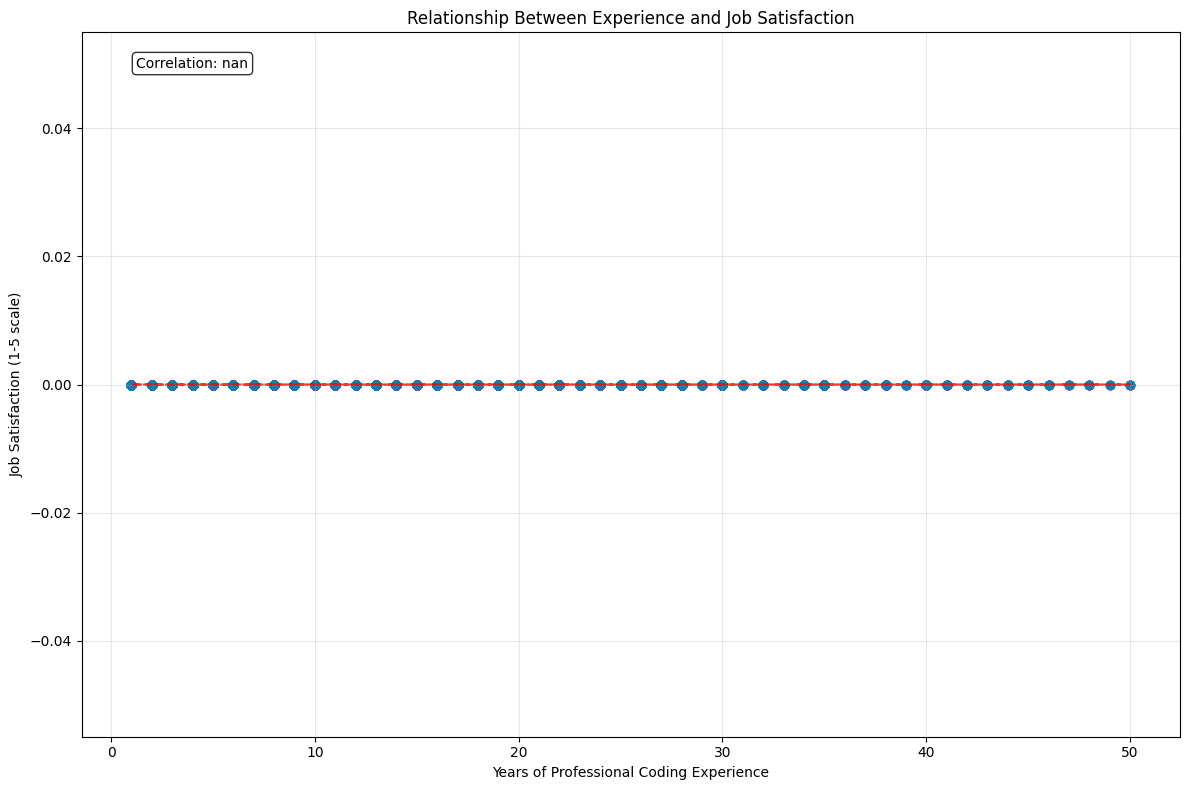

In [28]:
import numpy as np

# Filter out unknown satisfaction values
df_filtered = df[df['JobSat_numeric'].notna()]

plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['YearsCodePro'], df_filtered['JobSat_numeric'], alpha=0.6)
plt.title('Relationship Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_filtered['YearsCodePro'], df_filtered['JobSat_numeric'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['YearsCodePro'], p(df_filtered['YearsCodePro']), "r--", alpha=0.8)

# Calculate correlation
correlation = df_filtered['YearsCodePro'].corr(df_filtered['JobSat_numeric'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Educational Background by Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   
Unknown                                                            2516   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                             

/tmp/ipython-input-1164228950.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

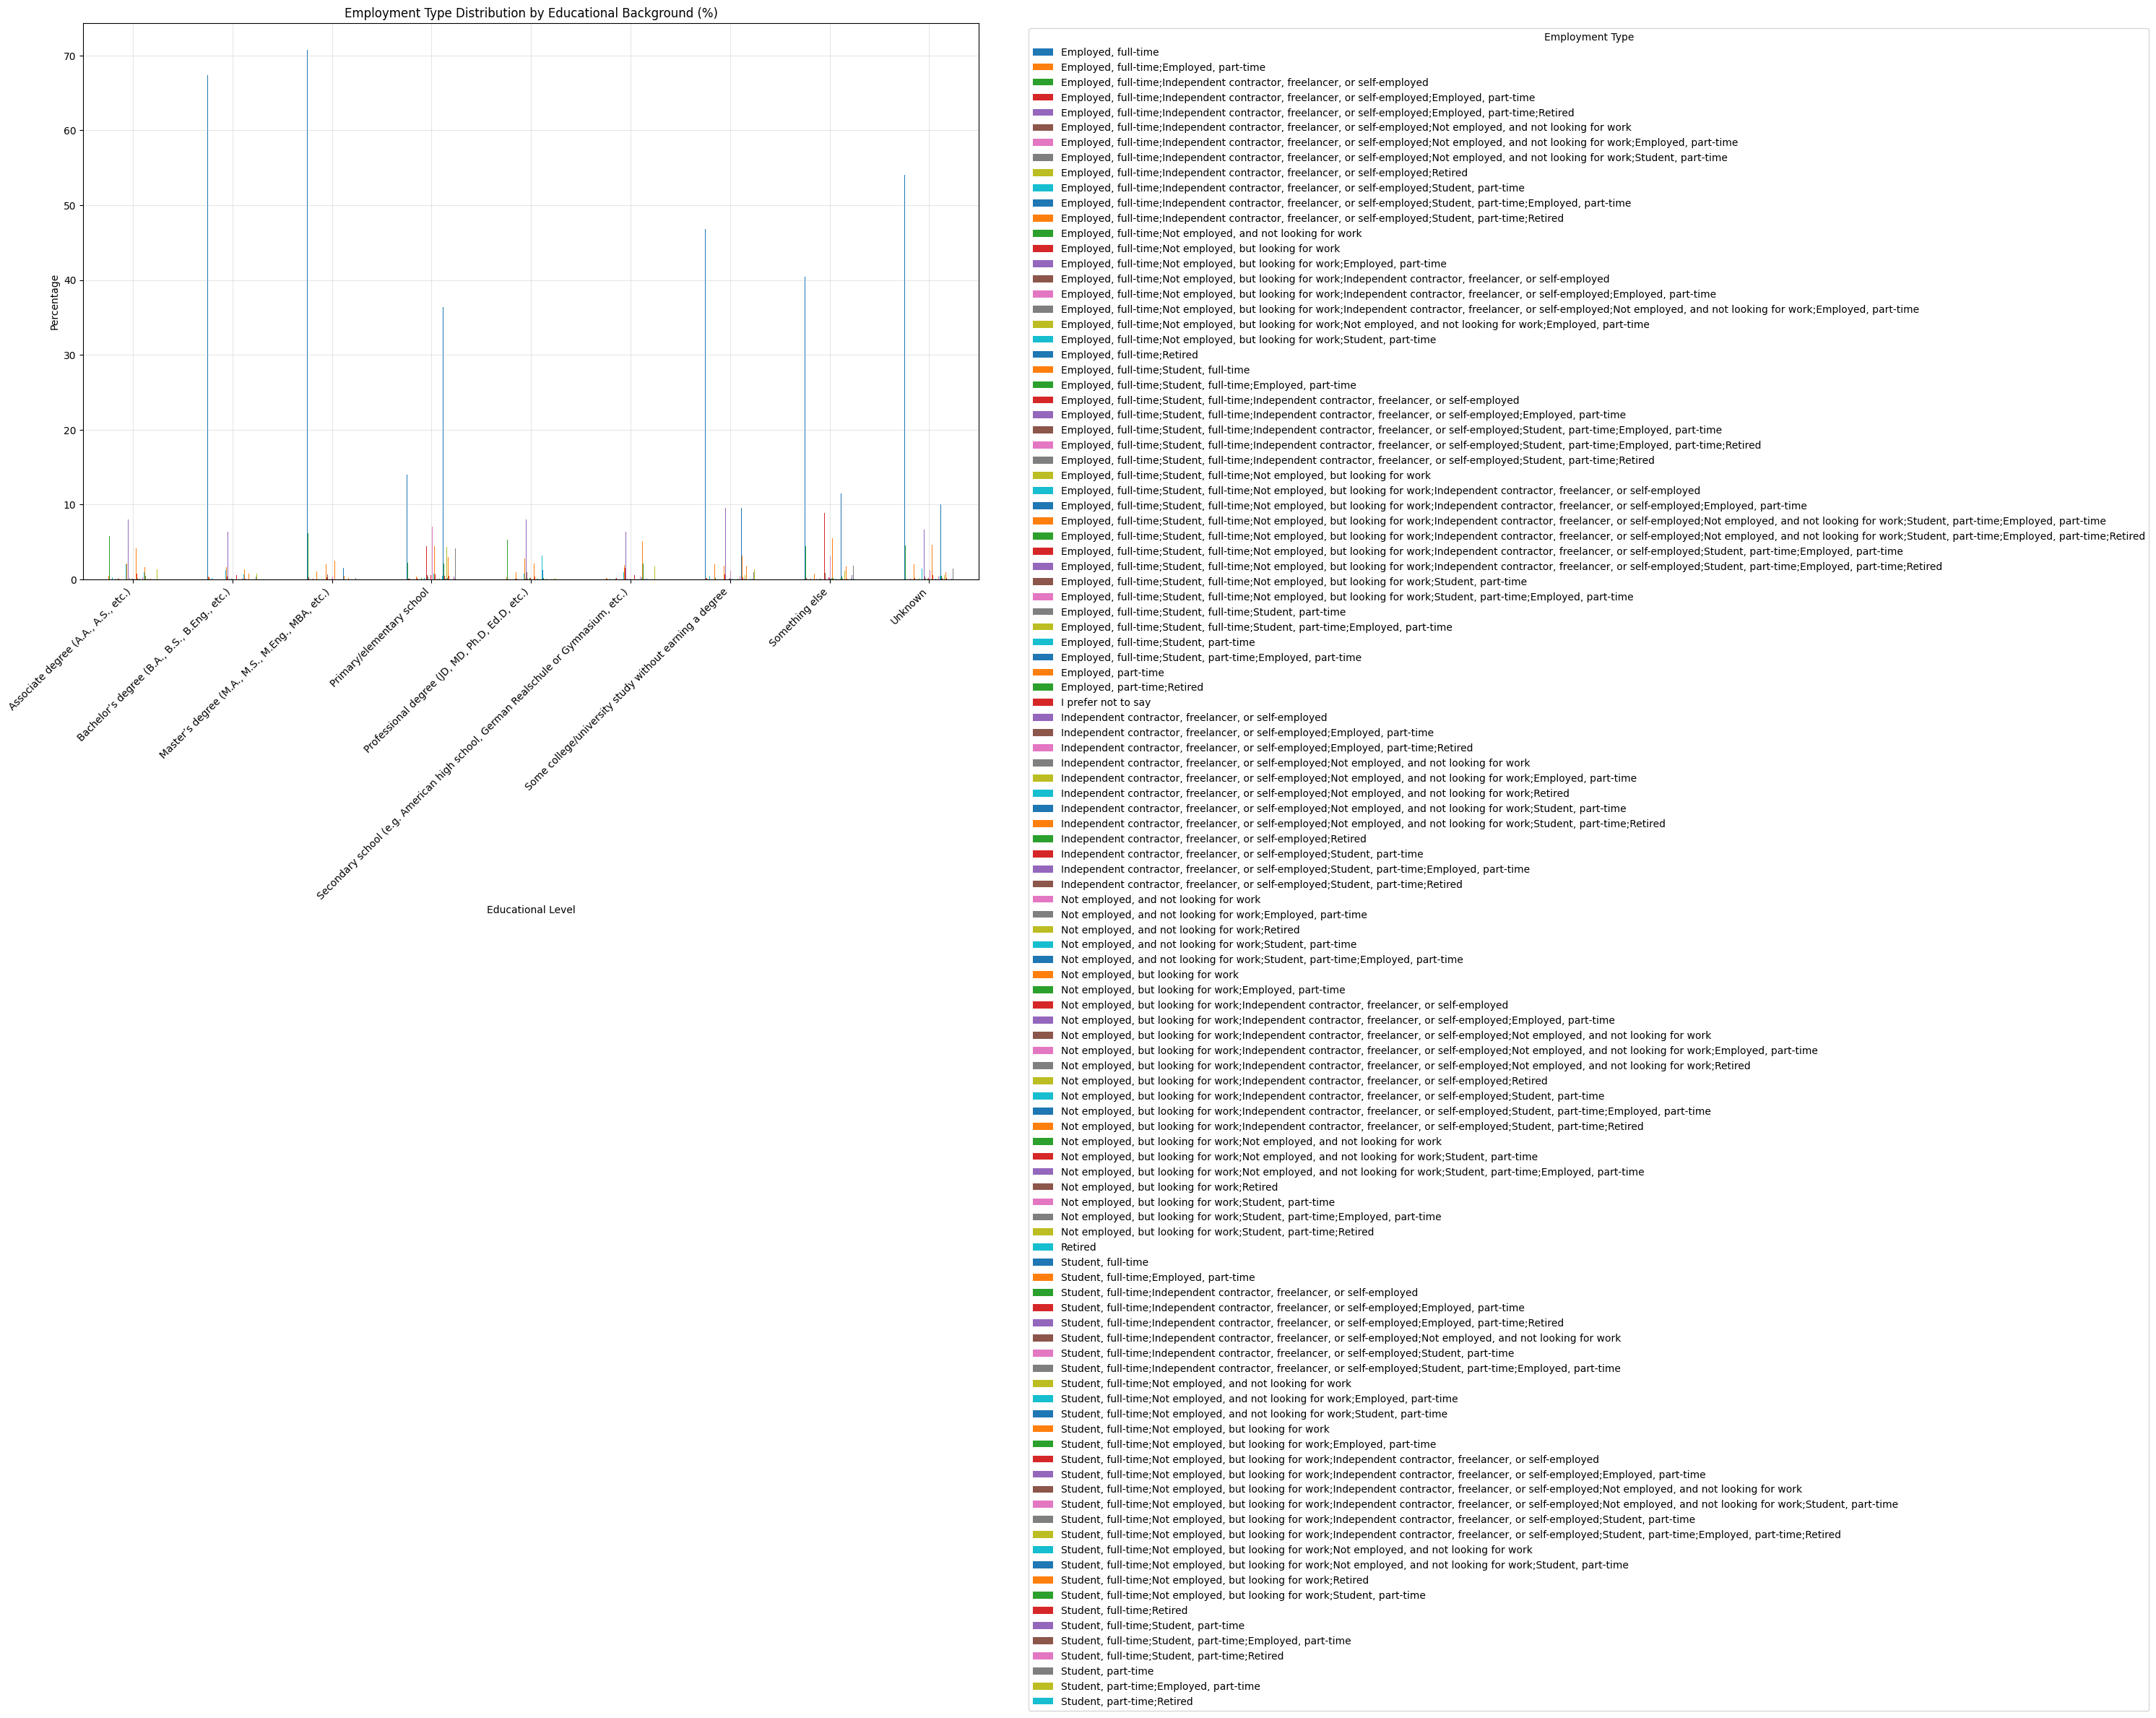

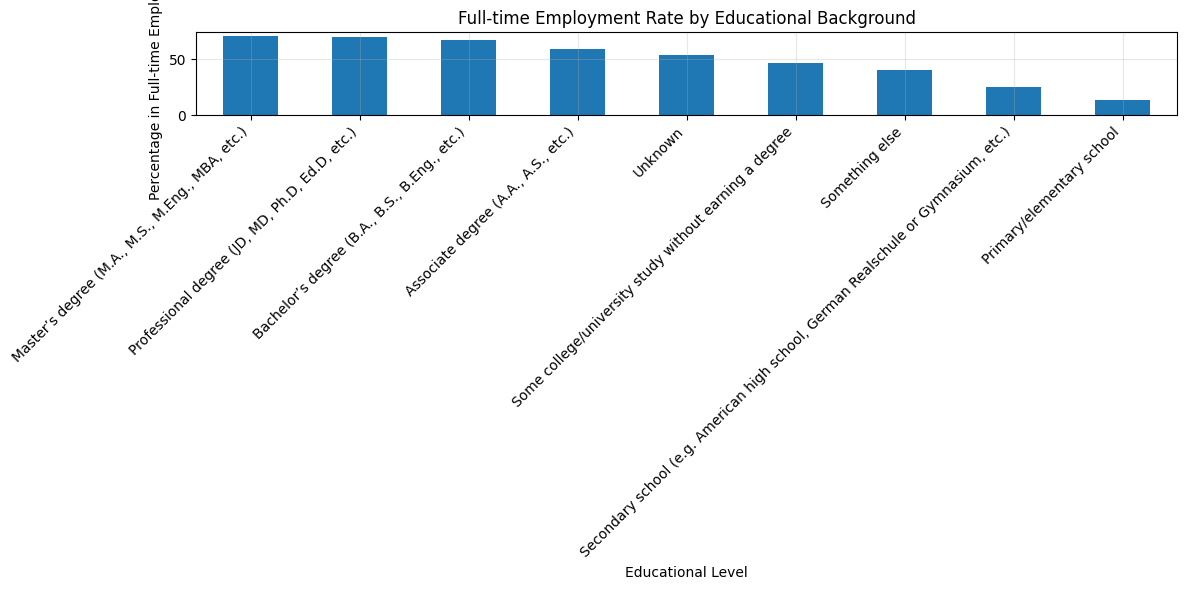

In [30]:
# Cross-tabulation
education_employment = pd.crosstab(df['EdLevel'], df['Employment'])
print("Educational Background by Employment Type:")
print(education_employment)

# Normalize by row to see percentages
education_employment_pct = education_employment.div(education_employment.sum(axis=1), axis=0) * 100

# Visualization
plt.figure(figsize=(16, 10))
education_employment_pct.plot(kind='bar', figsize=(16, 10))
plt.title('Employment Type Distribution by Educational Background (%)')
plt.xlabel('Educational Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Focus on full-time employment
plt.figure(figsize=(12, 6))
education_employment_pct['Employed, full-time'].sort_values(ascending=False).plot(kind='bar')
plt.title('Full-time Employment Rate by Educational Background')
plt.xlabel('Educational Level')
plt.ylabel('Percentage in Full-time Employment')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [31]:
# Save the cleaned dataset
df.to_csv('cleaned_survey_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_survey_data.csv'")

# Also save a version with only the analyzed columns for easier sharing
analyzed_columns = ['Employment', 'JobSat', 'RemoteWork', 'YearsCodePro', 'ExperienceRange',
                   'JobSat_numeric', 'Country', 'LanguageHaveWorkedWith', 'EdLevel']
df[analyzed_columns].to_csv('analyzed_survey_data.csv', index=False)
print("Analyzed dataset saved as 'analyzed_survey_data.csv'")

Cleaned dataset saved as 'cleaned_survey_data.csv'
Analyzed dataset saved as 'analyzed_survey_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
